In [1]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import stats, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import copy
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("/home/memari/jhu_centering/tables/ios_activity_cleaned.csv", parse_dates=['date'])

In [3]:
# find the first day
def find_first_day(device_id, df):
    df_target = df[df['device_id']==device_id]
    return min(df_target['date'])
def halve(df):
    first_day = {device_id:find_first_day(device_id, df) 
                 for device_id in set(df['device_id'].tolist())
                if find_first_day(device_id, df)>=datetime.date(year=2022,month=11,day=11)}
    df = df[df['device_id'].isin(first_day)]
    df['day'] = df.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_1_14 = df[df['day']<=14]
    df_15_28 = df[(df['day']>14) & (df['day']<=28)]
    return df_1_14,df_15_28
df_1_14,df_15_28 = halve(df)

In [4]:
col = df.columns.tolist()
col.insert(0,'day')
print(col)

['day', 'device_id', 'date', 'stationary', 'walking', 'running', 'automotive', 'cycling', 'unknown']


In [5]:
df_1_14 = df_1_14[col]
df_15_28 = df_15_28[col]

In [6]:
# get the groups form the survey data
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv',
                       skiprows=[1, 2])[['Study ID', 'Group']]
df_group.columns = ['survey_id', 'group']
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')
# merge the survey data with the device id
df_group = df_id.merge(df_group, on='survey_id', how='left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)
df_group = df_group.rename(columns={'group_x': 'group'})

In [7]:
df_1_14 = df_1_14.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')
df_15_28 = df_15_28.merge(df_group[['device_id', 'group']],
                   on='device_id', how='left')

In [8]:
grouped_1_14 = df_1_14 .groupby(['group'])
df_dict = {group: data for group, data in grouped_1_14}
active_control_1_14 = df_dict['Active Control']
experimental_condition_1_14 = df_dict['Experimental Condition']
passive_control_1_14 = df_dict['Passive Control']

In [9]:
grouped_15_28 = df_15_28 .groupby(['group'])
df_dict = {group: data for group, data in grouped_15_28}
active_control_15_28 = df_dict['Active Control']
experimental_condition_15_28 = df_dict['Experimental Condition']
passive_control_15_28 = df_dict['Passive Control']

In [10]:
to_remove = ['day', 'device_id', 'date']
my_list = [item for item in col if item not in to_remove]

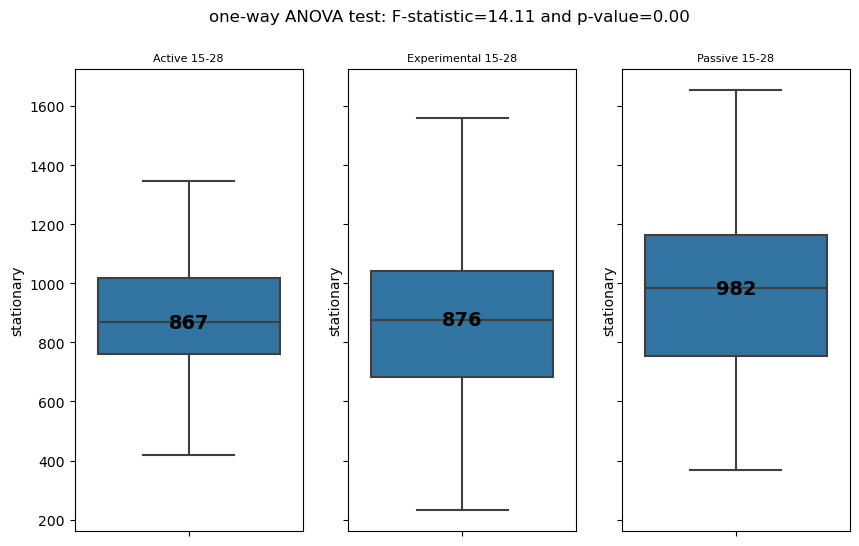

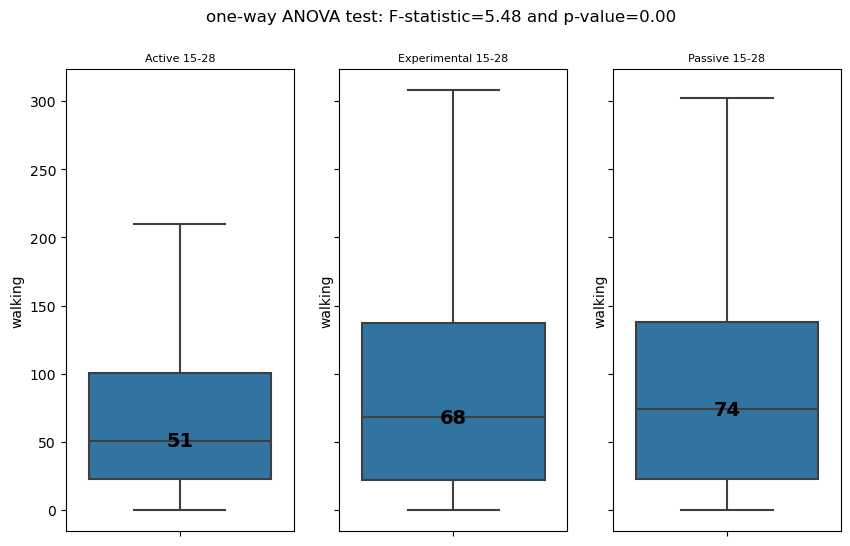

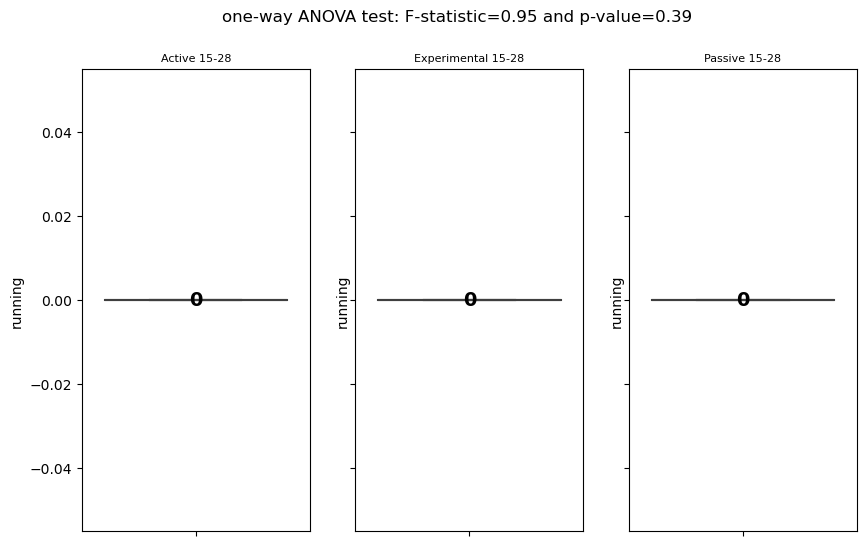

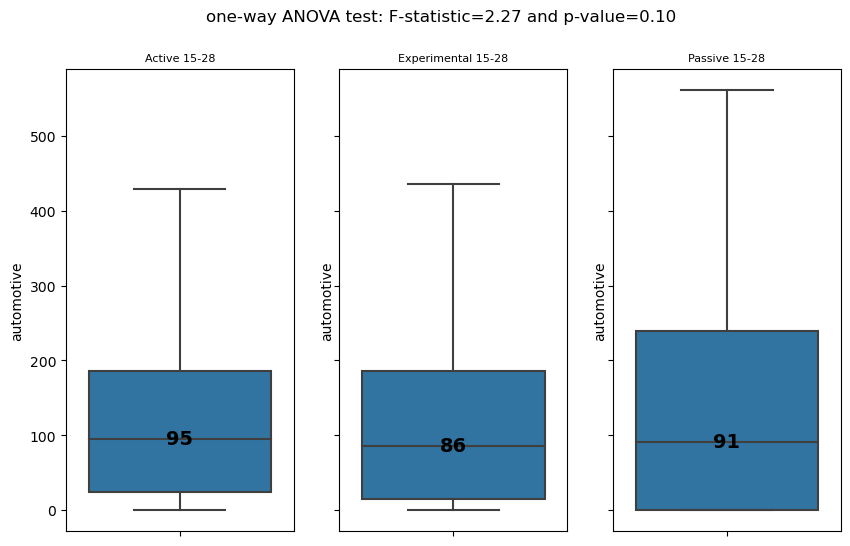

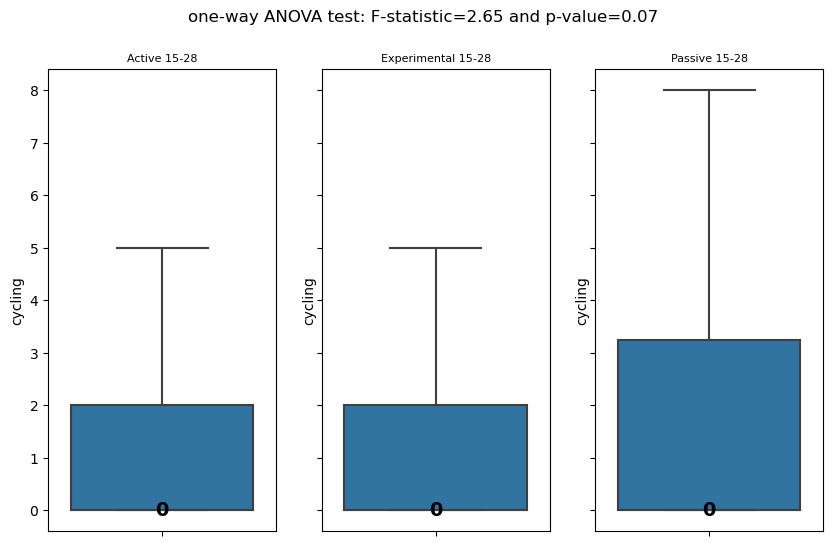

/home/memari/.conda/envs/dlatk_py38_majid/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


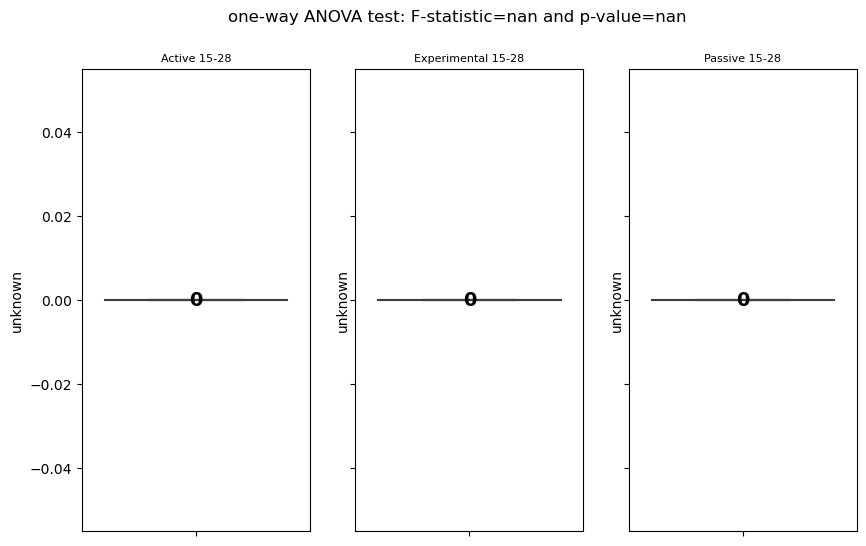

In [11]:
for clm in my_list:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

    sns.boxplot(y=active_control_15_28[clm], orient="v", showfliers=False, ax=ax1)

    sns.boxplot(y=experimental_condition_15_28[clm],orient="v", showfliers=False, ax=ax2)

    sns.boxplot(y=passive_control_15_28[clm], orient="v", showfliers=False, ax=ax3)


    ax1.set_title("Active 15-28", fontsize=8)
    m1 = int(active_control_15_28[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
    
    ax2.set_title("Experimental 15-28", fontsize=8)
    m2 = int(experimental_condition_15_28[clm].median())
    ax2.text(0, m2, m2, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})
   
    ax3.set_title("Passive 15-28", fontsize=8)
    m3 = int(passive_control_15_28[clm].median())
    ax3.text(0, m3, m3, ha='center', va='center',fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(active_control_15_28[clm], experimental_condition_15_28[clm], passive_control_15_28[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()